# ¿Cuál es un mejor plan?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de los planes genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

<h1>Indíce</h1>

- [Explicación](#Explicación)
- [Inicialización](#Inicialización)
- [Preparar los datos](#Preparar-los-datos)
- [Planes](#Planes)
- [Usuarios](#Usuarios)
- [Llamadas](#Llamadas)
- [Mensajes](#Mensajes)
- [Internet](#Internet)
- [Estudiar las condiciones del plan](#Estudiar-las-condiciones-del-plan)
- [Estudia el comportamiento del usuario](#Estudia-el-comportamiento-del-usuario)
- [Probar las hipótesis estadísticas](#Probar-las-hipótesis-estadísticas)
- [Conclusión](#Conclusión)


## Explicación

Megaline es una empresa de telecomunicaciones que desea saber por consejo de su grupo comercial cual de los planes que maneja actualmente para sus clientes es el que genera más ingresos, con el objetivo de ajustar el presupuesto de publicidad que se otorga a cada uno ellos.De esta forma, acuden al departamento de data science para analizar y determinar las opciones financieras y encontrarlas mejores soluciones para su crecimiento comercial y por ende financiero.

Así mismo, probar las hípotesis comerciales que ha realizado con anterioridad el equipo comercial, los cuales constan de las siguientes hipotesis:

- El **ingreso promedio de los usuarios de las tarifas Ultimate y Surf difiere**.
- El **ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey e**s diferente al de los usuarios de otras regiones.

<h1>Objetivo General</h1>
Analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

<h1>Objetivo Particular</h1>
<ul>
    <li>
    Leer los datos de los datasets otorgados.
    </li>
    <li>
    Verificar y reemplazar datos de forma sistématica.
    </li>
    <li>
    Analizar comportamiento de usuarios por mes.
    </li>
    <li>
    Pruebas de hipótesis.
    </li>
    <li>
    Leer los datos.
    </li>
</ul>

## Inicialización

In [237]:
# Cargar todas las librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import math
import scipy.stats as stats




## Cargar los datos

In [238]:
# Carga los archivos de datos en diferentes DataFrames


df_calls = pd.read_csv("/datasets/megaline_calls.csv")
df_internet = pd.read_csv("/datasets/megaline_internet.csv")
df_messages = pd.read_csv("/datasets/megaline_messages.csv")
df_plans = pd.read_csv("/datasets/megaline_plans.csv")
df_users = pd.read_csv("/datasets/megaline_users.csv")



## Preparar los datos

## Planes

In [239]:
# Imprime la información general/resumen sobre el DataFrame de los planes
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [240]:
# Imprime una muestra de los datos para los planes
df_plans.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Los datos tienen una buena apariencia , por lo que se considera dejarlos igual , a fin que no intervienen en el análisis.

## Corregir los datos

Al ser adecuados los datos no se corrigen pero se hacen unas comprobaciones para asegurarse de la información.

In [241]:
df_plans.isna().sum()
df_plans['plan_name'].unique()


array(['surf', 'ultimate'], dtype=object)

## Enriquecer los datos


No se enriquecen los datos dado a que para el analisis los datos con los que se cuentan son adecuados, se comprueba si hay derivados en el nombre de los planes debido a que este dato sera utilizado para unir los datos.

## Usuarios

In [242]:
# Imprime la información general/resumen sobre el DataFrame de los usuarios
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [243]:
# Imprime una muestra de los datos para los usuarios
df_users.head()



,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN




El tipo de dato para la columna reg_date debe cambiarse a date_time a fin de analizar bien los datos <br>



### Corregir datos

La columna reg_date se cambio de tipo a un data_time, se creia que churn_date tiene nulos por error, pero vemos que sirven para clasificar los clientes que aún estan en servicio.

In [244]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])
df_users.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


### Enriquecer datos


Se va agregar Month como columna nueva , dado a que, el analisis se hara por mes. <br>
Se va agregar Columna Year para categorizar por año ya que puede ser buena práctica para un posterior análisis.

In [245]:

df_users['year'] = df_users['reg_date'].dt.year
df_users['month'] = df_users['reg_date'].dt.month
df_users['year'] = df_users['year'].astype('int64')
df_users['month'] = df_users['month'].astype('int64')

df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     object        
 8   year        500 non-null    int64         
 9   month       500 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 39.2+ KB


Se imprimen los datos con head() para observar el funcionamiento en la clasificacion de month y year.

## Llamadas

In [246]:
# Imprime la información/resumen general sobre el DataFrame de las llamadas
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [247]:
# Imprime una muestra de datos para llamadas
df_calls.head()


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22




Se cambiará el formato de la columna call_date por uno que sea data_time <br>


### Corregir datos

In [248]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


### Enriquecer datos

Al igual que el anterior data set se agregara la columna month y year.

In [249]:
df_calls['year'] = df_calls['call_date'].dt.year
df_calls['month'] = df_calls['call_date'].dt.month
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
 4   year       137735 non-null  int64         
 5   month      137735 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 6.3+ MB


Se comprueba los datos enriquecidos imprimiendo la informacion

## Mensajes

In [250]:
# Imprime la información/resumen general sobre el DataFrame de los mensajes
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [251]:
# Imprime una muestra de datos para los mensajes
df_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26




Se corregira el formato de message_date por un data_time, para extraer informacion de year and month.

### Corregir datos

Se cambia el formato y se realizauna comprobación sencilla con el método info()

In [252]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enriquecer datos



Se agrega la columna year and month

In [253]:
df_messages['year'] = df_messages['message_date'].dt.year
df_messages['month'] = df_messages['message_date'].dt.month
df_messages.head()

,id,user_id,message_date,year,month
0,1000_125,1000,2018-12-27,2018,12
1,1000_160,1000,2018-12-31,2018,12
2,1000_223,1000,2018-12-31,2018,12
3,1000_251,1000,2018-12-27,2018,12
4,1000_255,1000,2018-12-26,2018,12


## Internet

In [254]:
# Imprime la información/resumen general sobre el DataFrame de los mensajes
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [255]:
# Imprime una muestra de datos para el tráfico de internet
df_internet.head()


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22




se cambiara el tipo de dato de session_date a un data_time.

### Corregir datos

Se corregira el tipo de dato de session_date a un data time y se imprime una comprobación

In [256]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enriquecer datos

Se aplica el enriquecimiento optando por agregar datos de year and month

In [257]:
df_internet['year'] =  df_internet['session_date'].dt.year
df_internet['month']  = df_internet['session_date'].dt.month
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   year          104825 non-null  int64         
 5   month         104825 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 4.8+ MB


## Estudiar las condiciones del plan

Se observarán de forma general la información de los planes.

In [258]:
# Imprime las condiciones del plan y asegúrate de que te resulten claros
df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Agregar datos por usuario

Se agruparán los datos por llamadas,cantidad de minutos, messages, internet consumido hechas por usuario cada mes para el análisis posterior.

In [259]:
# Calcula el número de llamadas hechas por cada usuario por mes. Guarda el resultado.

numcall_month_user = (
    df_calls
    .groupby(['user_id','month'])['id']
    .count()
    .reset_index()
    .rename(columns={'id':'spend_Calls'})
)
numcall_month_user




,user_id,month,spend_Calls
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


In [260]:
# Calcula la cantidad de minutos que usó cada usuario por mes. Guarda el resultado.



df_calls['duration'] = np.ceil(df_calls['duration'])

call_duration_user = (

    df_calls
    .groupby(['user_id','month'])['duration']
    .sum()
    .reset_index()
    .rename(columns={'duration':'spend_min_month'})
)



In [261]:
# Calcula el número de mensajes enviados por cada usuario por mes. Guarda el resultado.



messages_month_user = (
    
    df_messages
    .groupby(['user_id','month'])['id']
    .count()
    .reset_index()
    .rename(columns={'id':'spend_messages'})
)

messages_month_user
    




,user_id,month,spend_messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [262]:
# Calcula el volumen del trafico de internet usado por cada usuario por mes. Guarda el resultado.

internet_month_user = (
    
    df_internet
    .groupby(['user_id','month'])['mb_used']
    .sum()
    .reset_index()
    .rename(columns={'mb_used':'spend_mb'})
)
    
internet_month_user['spend_mb'] = internet_month_user['spend_mb'] / 1024
internet_month_user['spend_mb'] = np.ceil(internet_month_user['spend_mb'])






Se unen los datos en un data frame a través de user_id y month, se renombra el plan para agregarse posteriormente los datos de los planes.

In [263]:

# Combina los datos para las llamadas, minutos, mensajes e internet con base en el user_id y el mes

df_copy_user = df_users

consume_month_user = (
    numcall_month_user
    .merge(call_duration_user,on=['user_id','month'],how='outer')
    .merge(messages_month_user,on=['user_id','month'],how='outer')
    .merge(internet_month_user,on=['user_id','month'],how='outer')
    .merge(df_copy_user.rename(columns={'plan':'plan_name'}),on=['user_id'],how='inner') 
)

consume_month_user



,user_id,month_x,spend_Calls,spend_min_month,spend_messages,spend_mb,first_name,last_name,age,city,reg_date,plan_name,churn_date,year,month_y
0,1000,12,16.0,124.0,11.0,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,2018,12
1,1001,8,27.0,182.0,30.0,7.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,2018,8
2,1001,9,49.0,315.0,44.0,14.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,2018,8
3,1001,10,65.0,393.0,53.0,22.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,2018,8
4,1001,11,64.0,426.0,36.0,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,2018,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1204,12,NaN,NaN,78.0,36.0,Sherly,Levy,44,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-08-20,ultimate,NaN,2018,8
2289,1349,10,NaN,NaN,76.0,13.0,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",2018-10-01,surf,NaN,2018,10
2290,1349,11,NaN,NaN,72.0,17.0,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",2018-10-01,surf,NaN,2018,10
2291,1349,12,NaN,NaN,61.0,13.0,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",2018-10-01,surf,NaN,2018,10


Se agrega la información de los planes

In [264]:
# Añade la información del plan
consume_month_user = (
    consume_month_user
    .merge(df_plans,on=['plan_name'])
)

consume_month_user.fillna(0,inplace=True)


Se cambia el formato de mb a gb en las columna mb_per_month_included

In [265]:
consume_month_user['mb_per_month_included'] = consume_month_user['mb_per_month_included'] / 1024

consume_month_user

,user_id,month_x,spend_Calls,spend_min_month,spend_messages,spend_mb,first_name,last_name,age,city,...,churn_date,year,month_y,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,12,16.0,124.0,11.0,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,0,2018,12,1000,30.0,3000,70,7,0.01,0.01
1,1006,11,2.0,10.0,15.0,3.0,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,2018-12-18,2018,11,1000,30.0,3000,70,7,0.01,0.01
2,1006,12,9.0,59.0,139.0,32.0,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,2018-12-18,2018,11,1000,30.0,3000,70,7,0.01,0.01
3,1008,10,71.0,476.0,21.0,17.0,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,0,2018,8,1000,30.0,3000,70,7,0.01,0.01
4,1008,11,63.0,446.0,37.0,24.0,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,0,2018,8,1000,30.0,3000,70,7,0.01,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1194,11,0.0,0.0,62.0,42.0,Robert,Mclean,40,"San Jose-Sunnyvale-Santa Clara, CA MSA",...,0,2018,5,50,15.0,500,20,10,0.03,0.03
2289,1194,12,0.0,0.0,56.0,31.0,Robert,Mclean,40,"San Jose-Sunnyvale-Santa Clara, CA MSA",...,0,2018,5,50,15.0,500,20,10,0.03,0.03
2290,1349,10,0.0,0.0,76.0,13.0,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",...,0,2018,10,50,15.0,500,20,10,0.03,0.03
2291,1349,11,0.0,0.0,72.0,17.0,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",...,0,2018,10,50,15.0,500,20,10,0.03,0.03


Se crea función para proporcionar el gasto de cada usuario, calculando el precio del plan , más los servicioes de internet, message y llamadas que el usuario a excedido.

In [266]:
# Calcula el ingreso mensual para cada usuario
#consume_month_user['excess_call'] = 

def calculate_excess_call(row):
    if row['plan_name'] == 'surf':
        pay_monht_plan = row['usd_monthly_pay']
        gasto_llamada = max(0,row['spend_min_month'] - row['minutes_included'])
        gasto_sms =max(0,row['spend_messages'] - row['messages_included']) 
        gasto_datos_gb = max(0, (row['spend_mb'] - row['mb_per_month_included']) ) 
        price_minute = max(0,row['usd_per_minute'])
        price_sms = max(0,row['usd_per_message'])
        price_datos_gb = max(0,row['usd_per_gb'])
        total = max(0,((gasto_llamada * price_minute) if gasto_llamada > 0 else 0) + ((gasto_sms * price_sms) if gasto_sms > 0 else 0) + ((gasto_datos_gb * price_datos_gb) if gasto_datos_gb > 0 else 0))
        total = total + pay_monht_plan
        return total
    if row['plan_name'] == 'ultimate':
        pay_monht_plan = row['usd_monthly_pay']
        gasto_llamada = max(0,row['spend_min_month'] - row['minutes_included'])
        gasto_sms =max(0,row['spend_messages'] - row['messages_included']) 
        gasto_datos_gb = max(0, (row['spend_mb'] - row['mb_per_month_included']) ) 
        price_minute = max(0,row['usd_per_minute'])
        price_sms = max(0,row['usd_per_message'])
        price_datos_gb = max(0,row['usd_per_gb'])
        total = max(0,((gasto_llamada * price_minute) if gasto_llamada > 0 else 0) + ((gasto_sms * price_sms) if gasto_sms > 0 else 0) + ((gasto_datos_gb * price_datos_gb) if gasto_datos_gb > 0 else 0))
        total = total + pay_monht_plan
        return total
   

consume_month_user['total_pay_plan'] = consume_month_user.apply(calculate_excess_call, axis=1)

consume_month_user['total_pay_plan'].fillna(0)



    

0        70.00
1        70.00
2        84.00
3        70.00
4        70.00
         ...  
2288    290.36
2289    180.18
2290     20.78
2291     40.66
2292     20.33
Name: total_pay_plan, Length: 2293, dtype: float64

## Estudia el comportamiento del usuario



Se crean estadisticas descriptivas para comparar principalmente los planes por llamadas, mensajes e internet.

### Llamadas

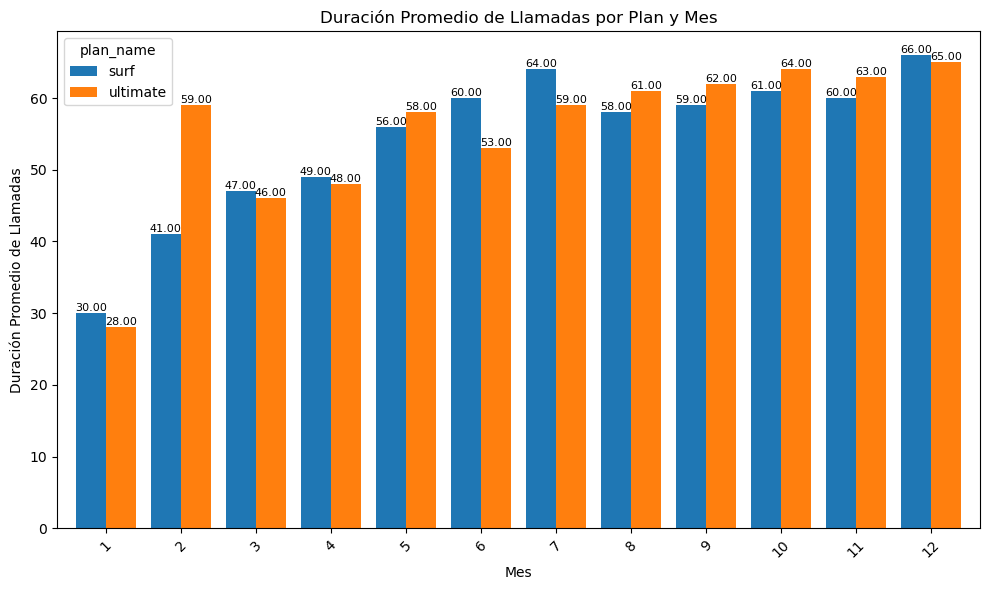

In [267]:
# Compara la duración promedio de llamadas por cada plan por cada mes. Dibuja una gráfica de barras para visualizarlo.



# Calcular la duración promedio de llamadas por cada plan y mes
average_call_duration = (
    consume_month_user
    .groupby(['plan_name', 'month_x'])['spend_Calls']
    .mean()
    .apply(lambda x: math.ceil(x)) 
)

# Crear una gráfica de barras con colores personalizados

ax = average_call_duration.unstack(level=0).plot(kind='bar', figsize=(10, 6), width=0.8)

# Personaliza la gráfica
ax.set_xlabel('Mes')
ax.set_ylabel('Duración Promedio de Llamadas')
ax.set_title('Duración Promedio de Llamadas por Plan y Mes')


# Añadir etiquetas de datos sobre las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)

# Mostrar la gráfica
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


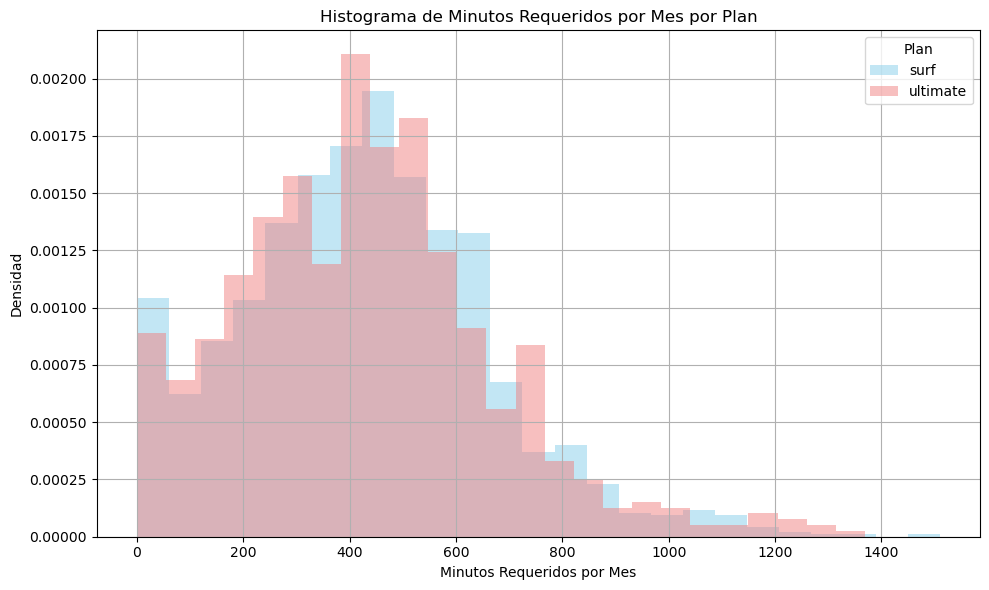

In [268]:
# Compara el número de minutos que los usuarios de cada plan requieren cada mes. Traza un histograma.


surf_data = consume_month_user[consume_month_user['plan_name'] == 'surf']
ultimate_data = consume_month_user[consume_month_user['plan_name'] == 'ultimate']

plt.figure(figsize=(10, 6))
plt.hist(surf_data['spend_min_month'], bins=25, alpha=0.5, label='surf', density=True, color='skyblue')
plt.hist(ultimate_data['spend_min_month'], bins=25, alpha=0.5, label='ultimate', density=True, color='lightcoral')

plt.xlabel('Minutos Requeridos por Mes')
plt.ylabel('Densidad')
plt.title('Histograma de Minutos Requeridos por Mes por Plan')
plt.legend(title='Plan')
plt.grid(True)

plt.tight_layout()
plt.show()



In [269]:

media_llamadas_surf = surf_data['spend_min_month'].mean()
media_llamadas_ultimate= ultimate_data['spend_min_month'].mean()
varianzaa_llamadas_surf = surf_data['spend_min_month'].var()
varianza_llamdas_ultimate = ultimate_data['spend_min_month'].var()


print(media_llamadas_surf)
print(media_llamadas_ultimate)
print(varianzaa_llamadas_surf)
print(varianza_llamdas_ultimate)




428.7495232040687
430.45
54968.279460650374
57844.4648122392


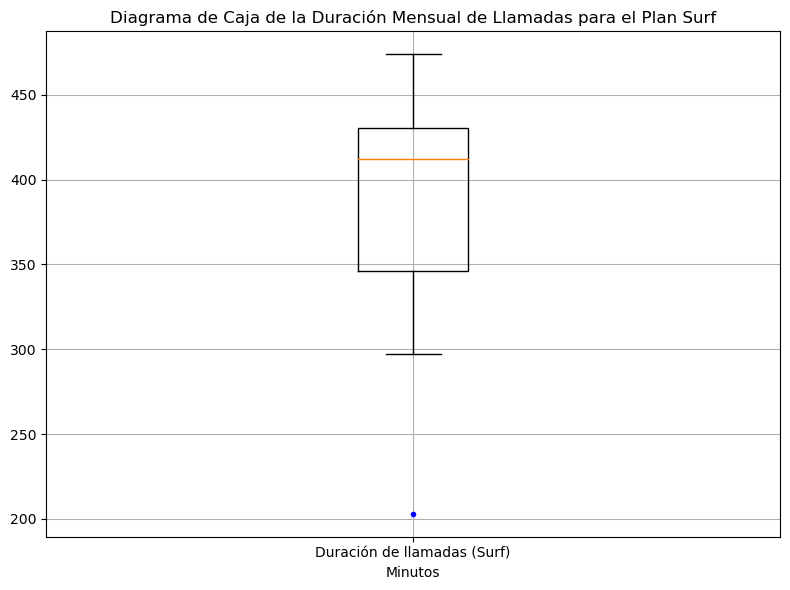

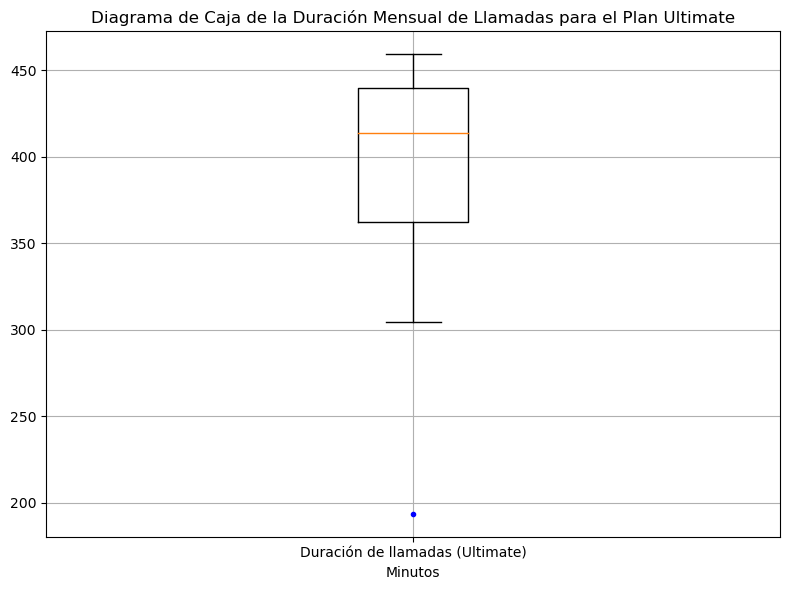

In [270]:


# Filtrar los datos por plan 'surf'
surf_data = consume_month_user[consume_month_user['plan_name'] == 'surf']
ultimate_data = consume_month_user[consume_month_user['plan_name'] == 'ultimate']

# Calcular la duración promedio de llamadas para 'surf'
average_call_min_duration_surf = (
    surf_data
    .groupby(['plan_name', 'month_x'])['spend_min_month']
    .mean()
)

plt.figure(figsize=(8, 6))
plt.boxplot(average_call_min_duration_surf, labels=['Duración de llamadas (Surf)'], sym='b.')
plt.title('Diagrama de Caja de la Duración Mensual de Llamadas para el Plan Surf')
plt.xlabel('Minutos')
plt.grid(True)

# Mostrar el diagrama de caja
plt.tight_layout()
plt.show()



# Filtrar los datos por plan 'ultimate'

# Calcular la duración promedio de llamadas para 'ultimate'
average_call_min_duration_ultimate = (
    ultimate_data
    .groupby(['plan_name', 'month_x'])['spend_min_month']
    .mean()
)

plt.figure(figsize=(8, 6))
plt.boxplot(average_call_min_duration_ultimate, labels=['Duración de llamadas (Ultimate)'], sym='b.')
plt.title('Diagrama de Caja de la Duración Mensual de Llamadas para el Plan Ultimate')
plt.xlabel('Minutos')
plt.grid(True)

# Mostrar el diagrama de caja
plt.tight_layout()
plt.show()



Conclusiones

Existe una muy tenue diferencia entre el valor máximo de la duración promedio de las llamada del plan surf frente al plan ultimate.

El valor mínimo es similar a la anterior conclusión, el plan surf presenta 30  como llamadas más corta en promedio, contra 28  del plan ultimate.

Al principio del año ambos planes tienen un promedio menor de llamadas y mientras se avanza se aumenta el uso promedio de las llamadas.

Los planes tienen diferente crecimiento frente a las llamadas pero parecen tener una interacción similar.

Los minutos requeridos requeridos son aproximadamente entre 400 y 410 por mes en los dos planes.

De acuerdo al diagrama de caja se puede determinar que hay mayor probabilidad que los usuarios del plan ultimate en promedio gasten mas de 400 en promedio por mes que menos, es decir en otras palabras los usuarios tienden a gastar los beneficios del plan.

 


### Mensajes

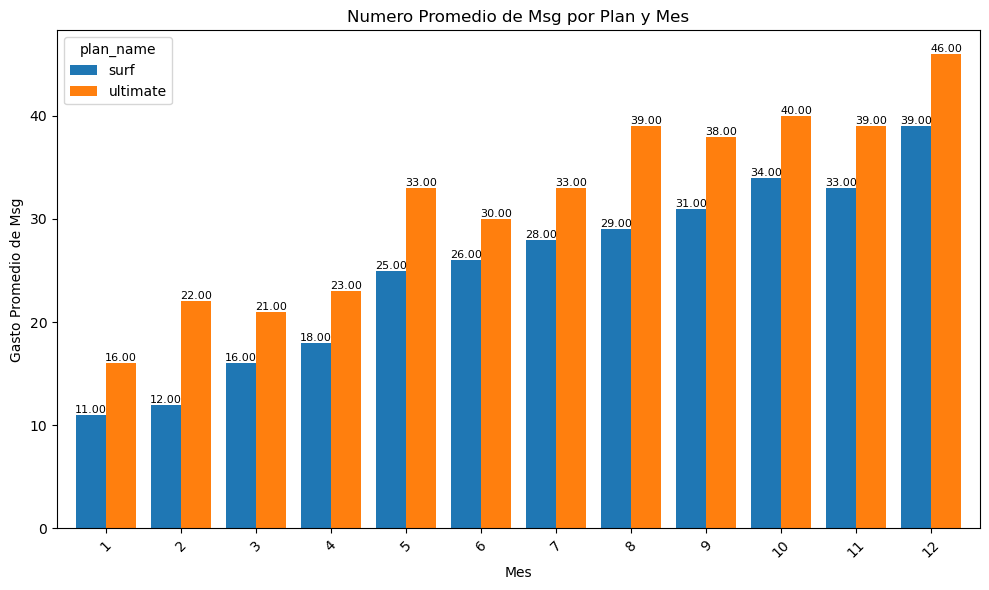

In [271]:

average_msg_duration = (
    consume_month_user
    .groupby(['plan_name', 'month_x'])['spend_messages']
    .mean()
    .apply(lambda x: math.ceil(x))    
)

#average_call_duration['spend_messages'] = np.ceil(average_call_duration['spend_messages'])
average_msg_duration


# Crea la gráfica de barras agrupadas
ax = average_msg_duration.unstack(level=0).plot(kind='bar', figsize=(10, 6), width=0.8)

# Personaliza la gráfica
ax.set_xlabel('Mes')
ax.set_ylabel('Gasto Promedio de Msg')
ax.set_title('Numero Promedio de Msg por Plan y Mes')

# Añadir etiquetas de datos sobre las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)

# Mostrar la gráfica
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()





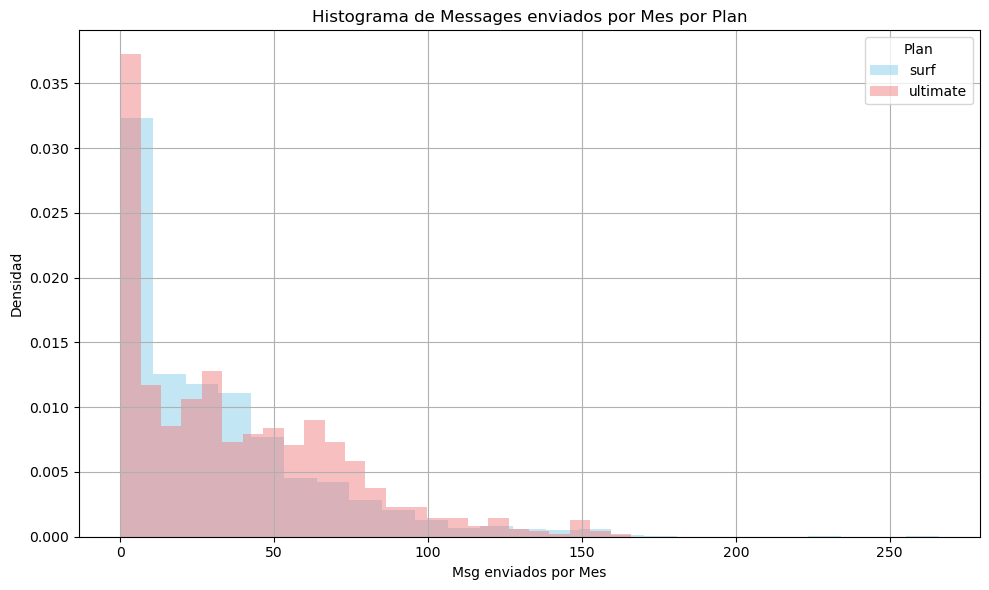

In [272]:
# Compara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan


plt.figure(figsize=(10, 6))
plt.hist(surf_data['spend_messages'], bins=25, alpha=0.5, label='surf', density=True, color='skyblue')
plt.hist(ultimate_data['spend_messages'], bins=25, alpha=0.5, label='ultimate', density=True, color='lightcoral')

plt.xlabel('Msg enviados por Mes')
plt.ylabel('Densidad')
plt.title('Histograma de Messages enviados por Mes por Plan')
plt.legend(title='Plan')
plt.grid(True)

plt.tight_layout()
plt.show()


In [273]:
# Calcula la media y la varianza de la duración mensual de llamadas.
# Calcular la media de la duración mensual de llamadas
media_msg_surf = surf_data['spend_messages'].mean()
media_msg_ultimate= ultimate_data['spend_messages'].mean()
# Calcular la varianza de la duración mensual de llamadas
varianzaa_msg_surf = surf_data['spend_messages'].var()
varianza_msg_ultimate = ultimate_data['spend_messages'].var()



print(varianzaa_msg_surf)
print(varianza_msg_ultimate)
print(media_msg_surf)
print(media_msg_ultimate)


1126.7245219504082
1208.756743548134
31.15956770502225
37.55138888888889


Conclusiones

Se muestra que hay una tendencia positiva debido a que mientras avanza el año el uso de messages se aumenta y aunque en el plan surf es casi menor en el plan ultimate se aumente de forma improporcional.

El historiograma demuestra que hay datos con una tendencia negativa, esto quiere decir que posiblemente hay muchos datos nulos o menores a la media, en otras palabras puede que algunos usuarios se limiten al usar los messages.

### Internet

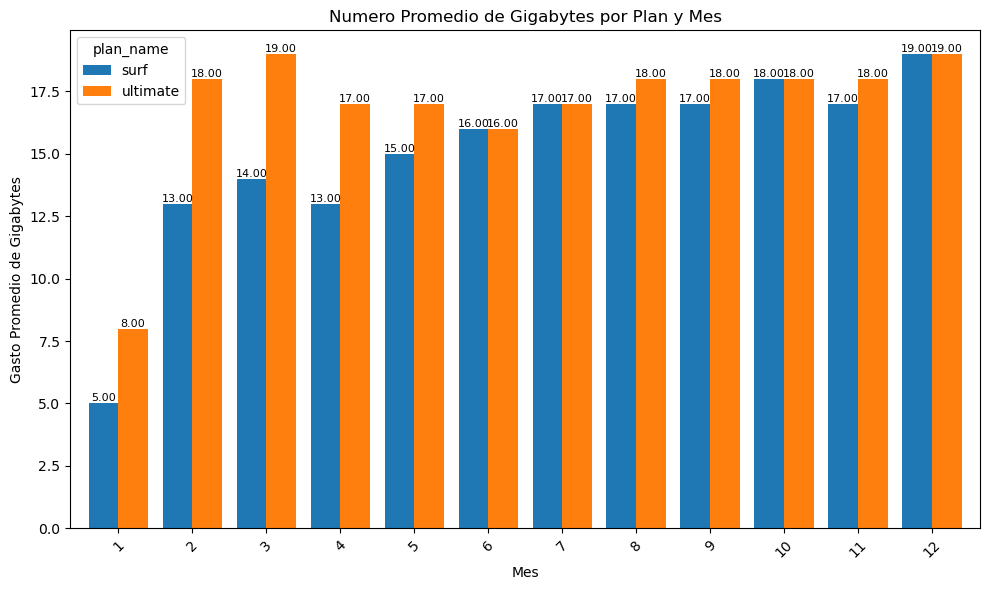

In [274]:
average_call_duration = (
    consume_month_user
    .groupby(['plan_name', 'month_x'])['spend_mb']
    .mean()
    .apply(lambda x: math.ceil(x)) 
)

# Crear una gráfica de barras con colores personalizados
colors = {'surf': 'blue', 'ultimate': 'black'}
ax = average_call_duration.unstack(level=0).plot(kind='bar', figsize=(10, 6), width=0.8)

# Personaliza la gráfica
ax.set_xlabel('Mes')
ax.set_ylabel('Gasto Promedio de Gigabytes')
ax.set_title('Numero Promedio de Gigabytes por Plan y Mes')

# Añadir etiquetas de datos sobre las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)

# Mostrar la gráfica
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

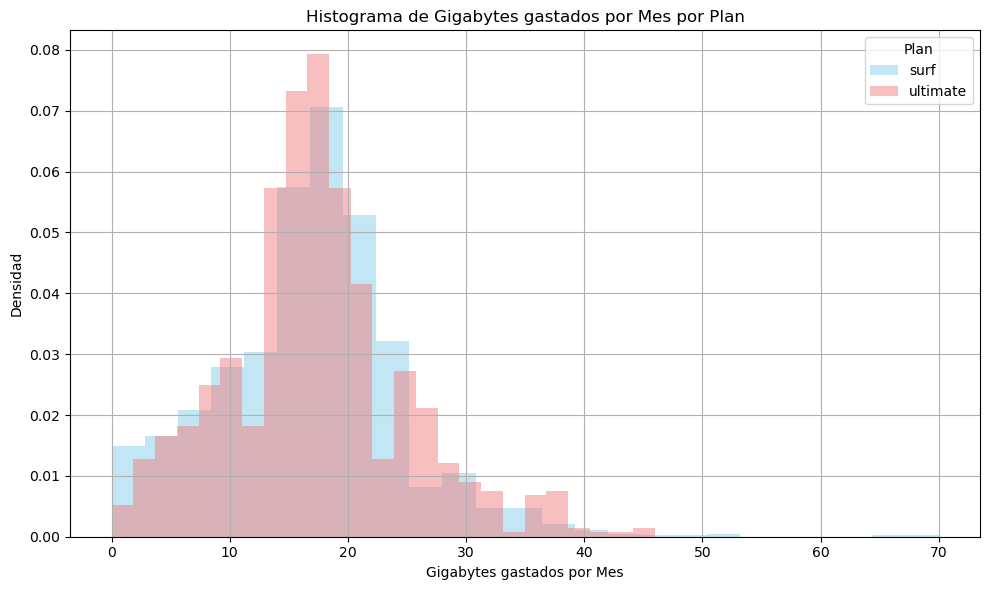

In [275]:
# Compara la cantidad de tráfico de internet consumido por usuarios por plan
plt.figure(figsize=(10, 6))
plt.hist(surf_data['spend_mb'], bins=25, alpha=0.5, label='surf', density=True, color='skyblue')
plt.hist(ultimate_data['spend_mb'], bins=25, alpha=0.5, label='ultimate', density=True, color='lightcoral')

plt.xlabel('Gigabytes gastados por Mes')
plt.ylabel('Densidad')
plt.title('Histograma de Gigabytes gastados por Mes por Plan')
plt.legend(title='Plan')
plt.grid(True)

plt.tight_layout()
plt.show()


In [276]:

media_llamadas_surf = surf_data['spend_mb'].mean()
media_llamadas_ultimate= ultimate_data['spend_mb'].mean()
varianzaa_llamadas_surf = surf_data['spend_mb'].var()
varianza_llamdas_ultimate = ultimate_data['spend_mb'].var()


print(media_llamadas_surf)
print(media_llamadas_ultimate)

print(varianzaa_llamadas_surf)
print(varianza_llamdas_ultimate)



16.670692943420217
17.306944444444444
61.583599837590185
58.8305497604697


Conclusiones

El uso de internet de ambos usuarios tanto en los planes surf y ultimate es ampliamente utilizado durante el transcurso del año, aunque a principio de año muestra una tendencia baja, el resto del año se mantiene con tendencia a la alsa.

Los usuarios del plan ultimate a comparación del surf son los que utilizan a gran medida el uso de internet al tener el doble de megabytes que el plan surf.

Los usuarios del plan ultimate podría concluirse que eligen este por que utilizan mayormente el internet, por otro lado los de surf suelen pagar cuotas similares al estar utilizando casi la misma cantidad de megabytes pero pagando una taza mas alta, este dato podría ser utilizado para desarrollar estrategias de marketing en pro del plan ultimate.

## Ingreso

Se abordará los ingresos de los diferentes planes por mes , a fin de visualizar graficamente la diferencia.

In [ ]:


average_money_income = (
    consume_month_user
    .groupby(['month_x','plan_name' ])['total_pay_plan']
    .sum()
    .apply(lambda x: math.ceil(x)) 
    .reset_index()
)


# Crear un gráfico de barras agrupado
pivot_table = average_money_income.pivot(index='month_x', columns='plan_name', values='total_pay_plan')
ax = pivot_table.plot(kind='bar', figsize=(10, 6), width=0.8)

# Personalizar el gráfico
plt.title('Ingresos Promedio por Mes y Plan')
plt.xlabel('Mes')
plt.ylabel('Ingreso Promedio')
plt.legend(title='Plan', loc='upper right')
plt.xticks(rotation=0)

# Agregar cifras como texto en las barras
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=8, color='black', weight='bold', labels=[f'{val:.2f}' for val in container.datavalues])

# Mostrar el gráfico
plt.tight_layout()
plt.show()







Conclusiones

Los ingresos que generan los usuarios del plan ultimate son mayores debido al precio del plan en general.

Mediante avanzó el año los ingresos de ambos planes fueron aumentando, siendo Noviembre un mes en el que se alcanzaron los ingresos máximos de ambos planes.

El plan ultimate es el que mas ingresos genera sea por nuevos usuarios o fidelización de los viejos por la cobertura de la marca.


## Probar las hipótesis estadísticas


Se probará la hipotesis sobre el ingreso promedio de los usuarios de los planes ultimate y surf, para comprobar su diferencia.

In [278]:
# Prueba las hipótesis


alpha = 0.05

# Establecer hipótesis nula y alternativa
# Hipótesis nula (H0): El ingreso promedio de los usuarios de los planes 'surf' y 'ultimate' es igual.
# Hipótesis alternativa (H1): El ingreso promedio de los usuarios de los planes 'surf' y 'ultimate' es diferente.

surf_income = consume_month_user.query('plan_name == "surf"')['total_pay_plan']
ultimate_income = consume_month_user.query('plan_name == "ultimate"')['total_pay_plan']

t_stat, p_value = stats.ttest_ind(surf_income, ultimate_income)

if p_value < alpha:
    # Rechazamos la hipótesis nula
    print('Rechazamos la hipótesis nula: El ingreso promedio de los usuarios de los planes "surf" y "ultimate" es diferente.')
else:
    # No rechazamos la hipótesis nula
    print('No rechazamos la hipótesis nula: El ingreso promedio de los usuarios de los planes "surf" y "ultimate" es igual.')



Rechazamos la hipótesis nula: El ingreso promedio de los usuarios de los planes "surf" y "ultimate" es diferente.


Se comprueba que el ingreso por plan y mes es diferente.

Se probará la hipotesis sobre elingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.

In [280]:
# Prueba las hipótesis

# Establecer hipótesis nula y alternativa
# Hipótesis nula (H0): El ingreso promedio de los usuarios del área NY-NJ no es diferente .
# Hipótesis alternativa (H1): El ingreso promedio de los usuarios del área NY-NJ es igual .

alpha = 0.05

t_stat, p_value = stats.ttest_ind(
    consume_month_user.query("city.str.contains('NY-NJ')")['total_pay_plan'],
    consume_month_user.query("~city.str.contains('NY-NJ')")['total_pay_plan']
)

if p_value < alpha:
    # Rechazamos la hipótesis nula
    print('Rechazamos la hipótesis nula: El ingreso promedio de los usuarios en el área de NY-NJ es diferente al de otras regiones.')
else:
    # No rechazamos la hipótesis nula
    print('No rechazamos la hipótesis nula: El ingreso promedio de los usuarios en el área de NY-NJ no es diferente al de otras regiones.')




Rechazamos la hipótesis nula: El ingreso promedio de los usuarios en el área de NY-NJ es diferente al de otras regiones.


Se comprueba que el ingreso de los usuarios de acuerdo a ciudad es diferente

## Conclusión

<h2>Preparar los datos</h2>

En esta sección  noté que los datos en general eran muy limpios pero que se podrían modificar si los tipos de datos que se relacionaban a fechas serian mejor en un datatime.

El enriquecimiento se dio en su mayoría a proporcionar el año y el mes, que serviría para su posterior análisis.

Se notó que las columnas nombradas como user_id podría ser un buen referente para unir datos posteriormente.

<h2>Agregar datos por usuario</h2>

Se crea la agrupación de datos aprovechando la columna month que se realizó con anterioridad para ser más eficiente el procesamiento.

Se unen para tener todo los datos disponibles en un df.

Lo adecuado es estimar el exceso de llamadas, msg e internet por cada usuario y por ende el precio total del pago por el exceso , lo cual se crea una función para determinar cuanto pago un usuario aparte de su papgo mensual.

<h2>Estudia el comportamiento del usuario</h2>
En lo personal esta parte es la que me agrado por realizar un análisis por parametro, como lo es llamada, msg y uso de internet.

Conclusiones de llamadas:
- Los usuarios mantienen una semejanza en los valores máximos en el gasto de las llamadas.

- Los usuarios tienden a gastar y no a ahorar sus beneficios en planes mensuales, es decir hay una clara tendencia a gastar más llamadas de las que incluye el plan.

Conclusiones de Mensajes: 
- Se muestra que hay una tendencia positiva debido a que mientras avanza el año el uso de messages se aumenta y aunque en el plan surf es casi menor en el plan ultimate se aumente de forma improporcional.

- El historiograma demuestra que hay datos con una tendencia negativa, esto quiere decir que posiblemente hay muchos datos nulos o menores a la media, en otras palabras puede que algunos usuarios se limiten al usar los messages.

Conclusiones de internet :
- Los usuarios del plan ultimate podría concluirse que eligen este por que utilizan mayormente el internet, por otro lado los de surf suelen pagar cuotas similares al estar utilizando casi la misma cantidad de megabytes pero pagando una taza mas alta, este dato podría ser utilizado para desarrollar estrategias de marketing en pro del plan ultimate.

- El uso de internet puede ser uno de los puntos claves para generar más clientes dado a que ,los usuarios mantienen un uso constante en el producto.

<h2>Ingreso</h2>

- El plan ultimate es el que más ingresos genera y posiblemente el que más retiene , esto sería un posible tema de análisis posterior.

- Si se quisiera aumentar los ingresos del plan ultimate podría desarrollar marketing enfocado al internet , dado a que , este es el punto clave de ambos paquetes.

- El plan surf mostró ingresos significativos en el mes 10, posiblemente tendría que desarrollarse marketing enfocados deadlines anteriores a este mes.

<h2>Hipótesis</h2>

- El ingreso promedio de los usuario por mes es diferente entre el plan surf y ultimate.

- El ingreso promedio basandose por ciudad y mes es diferente entre las ciudades.




